In [ ]:
#Importing necessary libraries for data analysis and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

# For machine learning models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, r2_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
# For handling imbalanced datasets
from imblearn.over_sampling import SMOTE
# For visualization of decision trees
from sklearn.tree import export_text, plot_tree
# Suppress warnings for cleaner outputs
import warnings
warnings.filterwarnings("ignore")
print("Libraries imported successfully!")


In [ ]:
# Importing necessary library for file handling
import pandas as pd
file_path = r"C:\Users\dorpl\Downloads\archive\web_scraped\diamond_data.csv"
# Reading the dataset
diamond_data = pd.read_csv(file_path)
# Display the first few rows of the dataset
print("Dataset loaded successfully!")
print(diamond_data.head())

Dataset loaded successfully!
                       path_to_img stock_number    shape  carat clarity  \
0  web_scraped/cushion/2106452.jpg      2106452  cushion   0.55     SI2   
1  web_scraped/cushion/2042329.jpg      2042329  cushion   0.52     SI2   
2  web_scraped/cushion/2055268.jpg      2055268  cushion   0.50     SI1   
3  web_scraped/cushion/2128779.jpg      2128779  cushion   0.50     VS2   
4  web_scraped/cushion/2103991.jpg      2103991  cushion   0.51     SI1   

  colour cut polish symmetry fluorescence  lab  length  width  depth  
0      N  VG     EX       VG            N  GIA    4.56   4.44   3.09  
1    Y-Z  EX     EX       VG            F  GIA    4.40   4.31   2.99  
2      L  VG     EX       VG            N  GIA    4.87   4.19   2.89  
3      M  EX     EX       VG            F  GIA    4.73   4.28   2.84  
4      M  EX     EX       VG            N  GIA    4.47   4.44   3.05  


In [ ]:
#Dropping irrelevant columns
diamond_data_cleaned = diamond_data.drop(columns=["path_to_img", "stock_number"], errors="ignore")

#Handle missing values: Fill categorical columns with the mode
categorical_columns = ["shape", "clarity", "colour", "cut", "polish", "symmetry", "fluorescence", "lab"]
for col in categorical_columns:
    diamond_data_cleaned[col].fillna(diamond_data_cleaned[col].mode()[0], inplace=True)

#Checking for missing values in numerical columns
numerical_columns = ["carat", "length", "width", "depth"]
if diamond_data_cleaned[numerical_columns].isnull().sum().sum() > 0:
    diamond_data_cleaned[numerical_columns] = diamond_data_cleaned[numerical_columns].fillna(0)

#One-hot encode categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop="first")
encoded_categorical = encoder.fit_transform(diamond_data_cleaned[categorical_columns])

#Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(diamond_data_cleaned[numerical_columns])

#Combine processed features
import numpy as np
processed_data = np.hstack([scaled_numerical, encoded_categorical])

# Convert to a DataFrame
processed_columns = numerical_columns + list(encoder.get_feature_names_out(categorical_columns))
processed_data_df = pd.DataFrame(processed_data, columns=processed_columns)

#Display the first few rows of the preprocessed dataset
print("Preprocessing completed!")
print(processed_data_df.head())


Preprocessing completed!
      carat    length     width     depth  shape_emerald  shape_heart  \
0 -0.701954 -1.239534 -1.102922 -0.787828            0.0          0.0   
1 -0.755114 -1.349995 -1.223760 -0.942896            0.0          0.0   
2 -0.790555 -1.025515 -1.335303 -1.097963            0.0          0.0   
3 -0.790555 -1.122169 -1.251646 -1.175496            0.0          0.0   
4 -0.772834 -1.301668 -1.102922 -0.849855            0.0          0.0   

   shape_marquise  shape_oval  shape_pear  shape_princess  ...  \
0             0.0         0.0         0.0             0.0  ...   
1             0.0         0.0         0.0             0.0  ...   
2             0.0         0.0         0.0             0.0  ...   
3             0.0         0.0         0.0             0.0  ...   
4             0.0         0.0         0.0             0.0  ...   

   fluorescence_NONE  fluorescence_SL  fluorescence_SLIGHT  fluorescence_ST  \
0                0.0              0.0                  0.0  

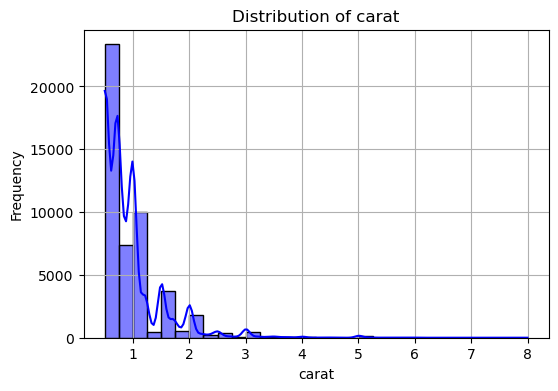

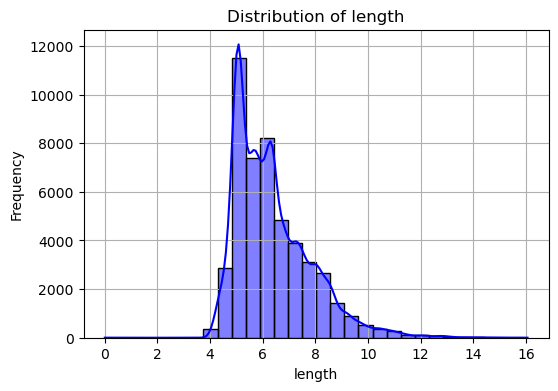

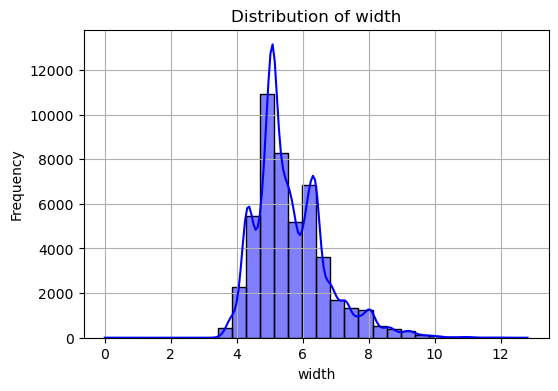

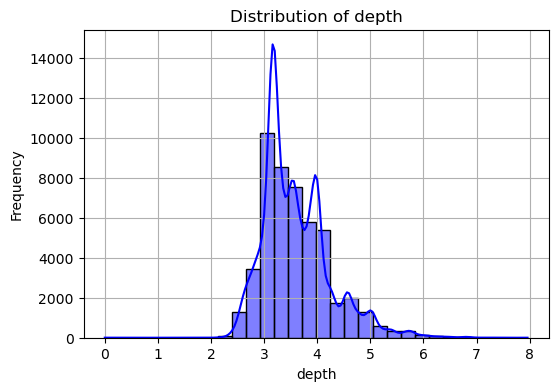

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions for numerical features
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(diamond_data_cleaned[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()


In [ ]:

target_variable = "price"
if target_variable in diamond_data_cleaned.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(diamond_data_cleaned[target_variable], kde=True, color='green', bins=30)
    plt.title(f'Distribution of Target Variable ({target_variable})')
    plt.xlabel(target_variable)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()


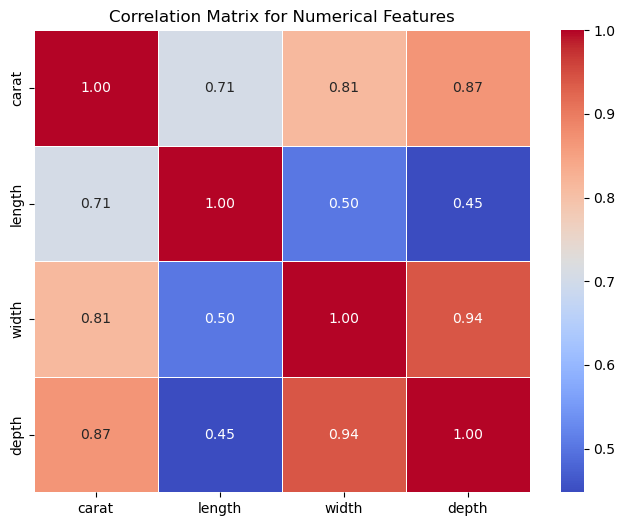

In [ ]:
# Calculate correlation matrix for numerical features
correlation_matrix = diamond_data_cleaned[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


In [ ]:
print(diamond_data_cleaned.columns)


Index(['shape', 'carat', 'clarity', 'colour', 'cut', 'polish', 'symmetry',
       'fluorescence', 'lab', 'length', 'width', 'depth'],
      dtype='object')


In [ ]:
# Define features (X) and target variable (y)
target_variable = "clarity"  # Set the target variable to 'clarity'
X = diamond_data_cleaned.drop(columns=[target_variable])  # Drop the target variable from the features
y = diamond_data_cleaned[target_variable]  # Target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (39012, 11)
Testing set shape: (9753, 11)


In [ ]:
pip install shap

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [ ]:
# Apply one-hot encoding to categorical variables
categorical_columns = ['shape', 'clarity', 'colour', 'cut', 'polish', 'symmetry', 'fluorescence', 'lab']
diamond_data_encoded = pd.get_dummies(diamond_data_cleaned, columns=categorical_columns, drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize label encoder
label_encoder = LabelEncoder()
# Apply label encoding to clarity (if it's ordinal)
diamond_data_cleaned['clarity'] = label_encoder.fit_transform(diamond_data_cleaned['clarity'])


In [ ]:
print(diamond_data_cleaned.columns)

Index(['shape', 'carat', 'clarity', 'colour', 'cut', 'polish', 'symmetry',
       'fluorescence', 'lab', 'length', 'width', 'depth'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize a LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to categorical columns
diamond_data['shape'] = label_encoder.fit_transform(diamond_data['shape'])
diamond_data['clarity'] = label_encoder.fit_transform(diamond_data['clarity'])
diamond_data['colour'] = label_encoder.fit_transform(diamond_data['colour'])
diamond_data['cut'] = label_encoder.fit_transform(diamond_data['cut'])
diamond_data['polish'] = label_encoder.fit_transform(diamond_data['polish'])
diamond_data['symmetry'] = label_encoder.fit_transform(diamond_data['symmetry'])
diamond_data['fluorescence'] = label_encoder.fit_transform(diamond_data['fluorescence'])
diamond_data['lab'] = label_encoder.fit_transform(diamond_data['lab'])

# Display the encoded DataFrame
print(diamond_data.head())


                       path_to_img stock_number  shape  carat  clarity  \
0  web_scraped/cushion/2106452.jpg      2106452      0   0.55       10   
1  web_scraped/cushion/2042329.jpg      2042329      0   0.52       10   
2  web_scraped/cushion/2055268.jpg      2055268      0   0.50        9   
3  web_scraped/cushion/2128779.jpg      2128779      0   0.50       14   
4  web_scraped/cushion/2103991.jpg      2103991      0   0.51        9   

   colour  cut  polish  symmetry  fluorescence  lab  length  width  depth  
0      15    5       0         5             3    0    4.56   4.44   3.09  
1      22    0       0         5             0    0    4.40   4.31   2.99  
2      13    5       0         5             3    0    4.87   4.19   2.89  
3      14    0       0         5             0    0    4.73   4.28   2.84  
4      14    0       0         5             3    0    4.47   4.44   3.05  


In [ ]:
# Define features (X) and target variable (y)
X = diamond_data.drop(columns=['path_to_img', 'stock_number', 'clarity'])  # Exclude non-relevant columns
y = diamond_data['clarity']  # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the model
model = DecisionTreeClassifier(random_state=42)
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.25704911309340717
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.02      0.02      0.02        62
           2       0.38      0.50      0.43         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       0.06      0.08      0.07       167
           9       0.26      0.28      0.27      2010
          10       0.41      0.41      0.41      1974
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.24      0.24      0.24      1827
          14       0.25      0.25      0.25      2156
          15       0.09      0.10      0.10       587
          16       0.12      0.11      0.12       941
          17       0.33    

C:\Users\dorpl\OneDrive\Documents\DS675\Diamond\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dorpl\OneDrive\Documents\DS675\Diamond\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dorpl\OneDrive\Documents\DS675\Diamond\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

In [ ]:
pip install xgboost


     -------------------------------------- 124.9/124.9 MB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install lightgbm


In [ ]:
print(diamond_data_encoded.columns)


Index(['carat', 'length', 'width', 'depth', 'shape_emerald', 'shape_heart',
       'shape_marquise', 'shape_oval', 'shape_pear', 'shape_princess',
       'shape_round', 'clarity_1', 'clarity_2', 'clarity_3', 'clarity_4',
       'clarity_5', 'clarity_6', 'clarity_7', 'clarity_8', 'clarity_9',
       'clarity_10', 'clarity_11', 'clarity_12', 'clarity_13', 'clarity_14',
       'clarity_15', 'clarity_16', 'colour_D', 'colour_D:P:BN', 'colour_E',
       'colour_F', 'colour_FANCY', 'colour_FC:P', 'colour_G', 'colour_H',
       'colour_I', 'colour_I:P', 'colour_J', 'colour_K', 'colour_L',
       'colour_M', 'colour_N', 'colour_O-P', 'colour_Q-R', 'colour_S-T',
       'colour_U-V', 'colour_V:B', 'colour_W-X', 'colour_Y-Z', 'cut_F',
       'cut_FG', 'cut_GD', 'cut_IDEAL', 'cut_VG', 'polish_GD', 'polish_VG',
       'symmetry_F', 'symmetry_G', 'symmetry_GD', 'symmetry_PR', 'symmetry_VG',
       'fluorescence_M', 'fluorescence_MED', 'fluorescence_N',
       'fluorescence_NONE', 'fluorescence_SL', 

In [ ]:
# Define target variable (clarity) and feature columns
target_variable = "clarity_1"  # Change this as needed to the target clarity category (e.g., clarity_1)

# Features (X) are all columns except the target variable
X = diamond_data_encoded.drop(columns=[target_variable])

# Target (y) is the specific clarity category (e.g., clarity_1)
y = diamond_data_encoded[target_variable]


In [ ]:
# Clean feature names by removing or replacing special characters
X.columns = X.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)

# Now, train the model
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a LightGBM model
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


[LightGBM] [Info] Number of positive: 218, number of negative: 38794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.203127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 39012, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005588 -> initscore=-5.181526
[LightGBM] [Info] Start training from score -5.181526
Accuracy: 0.9995898697836563


In [ ]:

def clean_column_names(df):
    df.columns = df.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
    # Strip leading/trailing whitespaces
    df.columns = df.columns.str.strip()
    # Ensure all column names are lowercase
    df.columns = df.columns.str.lower()
    return df

#Clean the column names
X = clean_column_names(X)
y = diamond_data_encoded[target_variable]
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Step 5: Train and evaluate each model

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# LightGBM
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)

# Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Step 6: Print the accuracy and classification report for each model
print("Logistic Regression Accuracy:", log_reg_accuracy)
print(classification_report(y_test, y_pred_log_reg))

print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, y_pred_dt))

print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred_rf))

print("XGBoost Accuracy:", xgb_accuracy)
print(classification_report(y_test, y_pred_xgb))

print("LightGBM Accuracy:", lgbm_accuracy)
print(classification_report(y_test, y_pred_lgbm))

print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, y_pred_svm))

# Step 7: Compare the models
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'SVM'],
    'Accuracy': [log_reg_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, lgbm_accuracy, svm_accuracy]
})

print("\nModel Comparison based on Accuracy:")
print(model_comparison.sort_values(by='Accuracy', ascending=False))


[LightGBM] [Info] Number of positive: 218, number of negative: 38794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 39012, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005588 -> initscore=-5.181526
[LightGBM] [Info] Start training from score -5.181526
Logistic Regression Accuracy: 0.9991797395673127
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9691
           1       0.89      1.00      0.94        62

    accuracy                           1.00      9753
   macro avg       0.94      1.00      0.97      9753
weighted avg       1.00      1.00      1.00      9753

Decision Tree Accuracy: 0.9983594791346252
              precision  